In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#initial simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=10)
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        #x = x.view(-1, 64 * 8 * 8)
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [2]:
#adding two extra layers to simple model
#added pooling - which downsamples the data 
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        #x = x.view(-1, 64 * 8 * 8)
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#switching from ReLU to leakyReLU
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
    def forward(self, x):
        x = nn.functional.leaky_relu(self.conv1(x), negative_slope=0.1)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.leaky_relu(self.conv2(x), negative_slope=0.1)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.leaky_relu(self.conv3(x), negative_slope=0.1)
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        #x = x.view(-1, 64 * 8 * 8)
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#CIFAR2 #input batch size error unable to be resolved. 
import torch.nn.functional as F

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)        
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.fc1 = nn.Linear(256 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 256 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [3]:
# Define the dataset and data loader
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.RandomCrop(32, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

CIFAR10

In [4]:
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

Files already downloaded and verified


In [5]:
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

Files already downloaded and verified


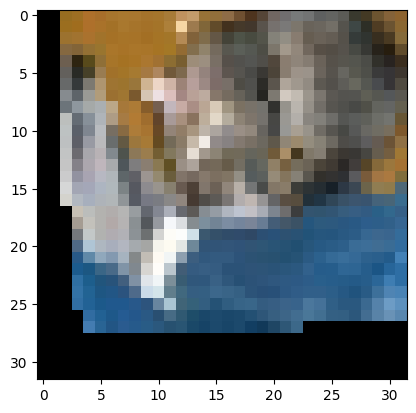

cat


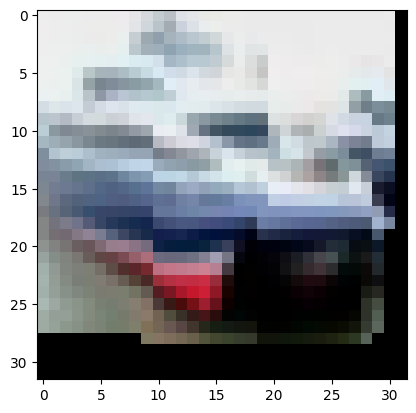

ship


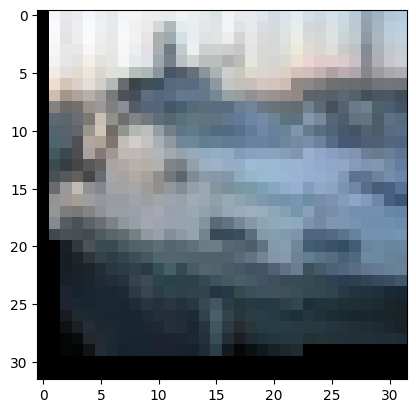

ship


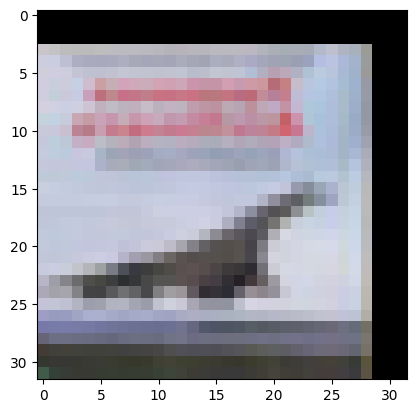

plane


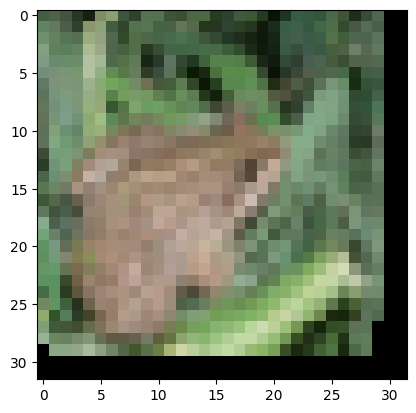

frog


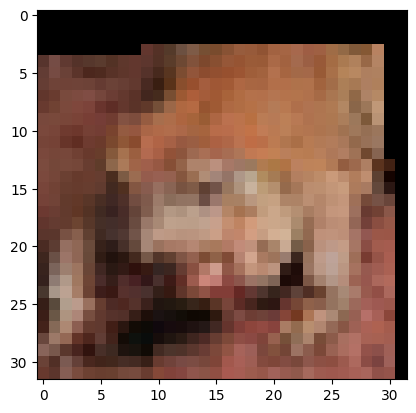

frog


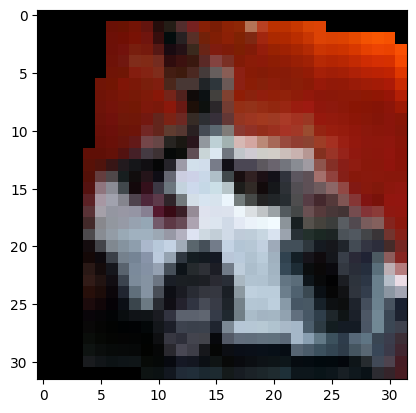

car


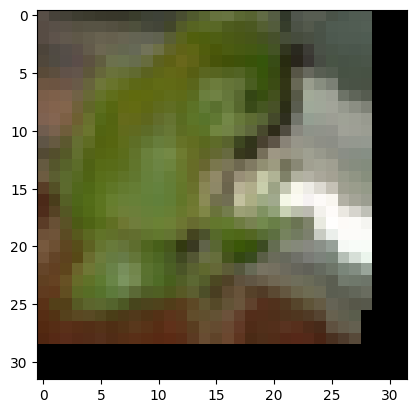

frog


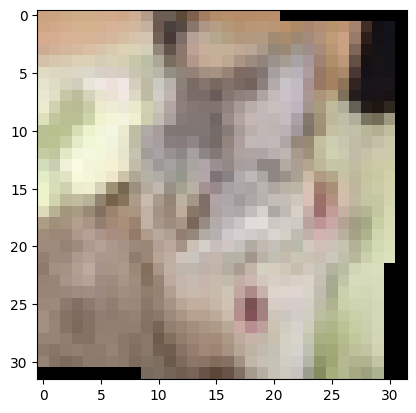

cat


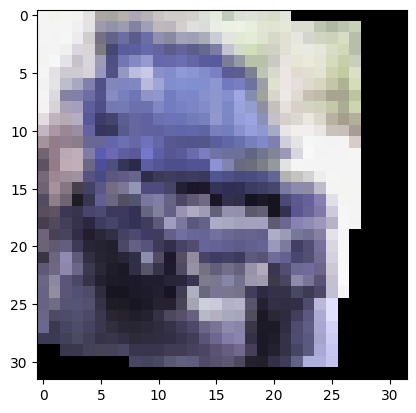

car


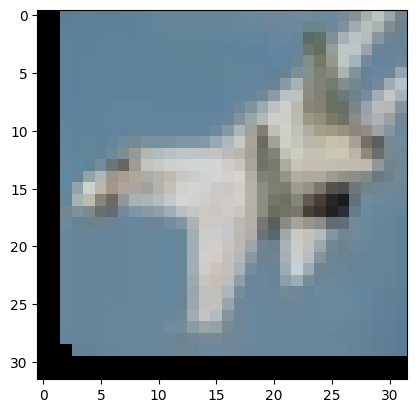

plane


In [6]:
#digging a bit deeper into the data by visualizing it 
#code is mostly taken from ChatGPT
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # change the order of the dimensions in the numpy array 
    plt.show()
for i, (img, label) in enumerate(testset):
    imshow(torchvision.utils.make_grid(img))
    print(classes[label])
    if i == 10: #how many images to show
        break

In [6]:
# Define the loss function and optimizer
model = SimpleModel()
#loss function is used to measure the error between the predicted output of the model and the ground-truth label
criterion = nn.CrossEntropyLoss() #LF
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Define the number of training epochs
num_epochs = 100

In [ ]:
#TEMP load in model
model = SimpleModel()
model.load_state_dict(torch.load('CI1_model.pt'))
#works

In [9]:
# Define stop point for model once test loss stops improving
patience = 5 #how many cycles after no improvement to stop training
counter = 0

In [11]:
# Train the model
print('Begin model training')
print('Patience has been set at {}'.format(patience))
valid_test = 99
epoch_test = 0
train_losses = []
test_losses = []
train_acc = []
test_acc = []
t1 = time.perf_counter()
for epoch in range(num_epochs):
    train_loss = 0
    test_loss = 0
    
    #Training 
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels) #criterion is loss function
        loss.backward() #used to calculate the gradients of the parameters of a model with respect to a loss function
        optimizer.step()
        train_loss += loss.item()
        total += labels.size(0)
        #correct += (preds == labels).sum().item()
    #train_acc.append(correct/total)
    
    #Validation
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
    
    new_train_lost = train_loss / len(train_loader)
    new_valid_lost = test_loss / len(test_loader)
    
    #Save trained model if it is improved 
    if new_valid_lost < valid_test:
        valid_test = new_valid_lost
        epoch_test = epoch+1
        torch.save(model.state_dict(), "CI2_model.pt")
        counter = 0
        print ('Temp model saved at Epoch {} with validation lost of {:.4f}'.format(epoch_test, valid_test))
    else:
        counter+=1
        print('No improvement in test, count is {}'.format(counter))
        
    #Terminates training after model stops improving based on patience 
    if counter > patience:
        break
    
    #prints stuff
    t2 = time.perf_counter()
    print('In Epoch {} Training loss is {:.4f} and Training accuracy is {:.2f}'.format(epoch + 1, new_train_lost, correct/total))
    print('Testing loss for Epoch {} is {:.4f}'.format(epoch + 1, new_valid_lost))
    print('Completed Epoch {} in {:.1f} seconds'.format(epoch + 1, t2-t1))
    #print('Epoch: {} Loss: {:.4f} Train_Acc: {:.4f}'.format(epoch, train_loss / len(dataloader), running_corrects.double() / len(dataset)))
    
    #makes list of losses
    train_losses.append(new_train_lost)
    test_losses.append(new_valid_lost)

print ('Final model saved at Epoch {} with validation lost of {:.4f}'.format(epoch_test, valid_test))


Temp model saved at Epoch 1 with validation lost of 1.4161
In Epoch 1 Training loss is 1.6400 and Training accuracy is 0.00
Testing loss for Epoch 1 is 1.4161
Completed Epoch 1 in 100.2 seconds
Temp model saved at Epoch 2 with validation lost of 1.1600
In Epoch 2 Training loss is 1.2583 and Training accuracy is 0.00
Testing loss for Epoch 2 is 1.1600
Completed Epoch 2 in 214.7 seconds
Temp model saved at Epoch 3 with validation lost of 1.0114
In Epoch 3 Training loss is 1.0715 and Training accuracy is 0.00
Testing loss for Epoch 3 is 1.0114
Completed Epoch 3 in 349.3 seconds
Temp model saved at Epoch 4 with validation lost of 0.9455
In Epoch 4 Training loss is 0.9513 and Training accuracy is 0.00
Testing loss for Epoch 4 is 0.9455
Completed Epoch 4 in 455.5 seconds
Temp model saved at Epoch 5 with validation lost of 0.8763
In Epoch 5 Training loss is 0.8628 and Training accuracy is 0.00
Testing loss for Epoch 5 is 0.8763
Completed Epoch 5 in 573.9 seconds
Temp model saved at Epoch 6 wi

In [ ]:
# Write train and test lists to a CSV file
with open('CI2_loss.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Training Loss', 'Test Loss', 'Train Accuracy', 'Test Accuracy'])
    rows = zip(train_losses, test_losses, train_acc, test_acc)
    writer.writerows(rows)

In [9]:
#saving the model with the least test loss!
torch.save(model.state_dict(), "CI2_model.pt")

In [17]:
print('training complete')

training complete


In this example, the CIFAR-10 dataset is loaded and transformed with normalization, then the data is split into training and test sets and loaded into DataLoader objects for easy batching during